# Part 2: Attention Mechanism - The Breakthrough

## Welcome Back!

In Part 1, you learned about the context vector **bottleneck**. Now you'll discover the solution: **Attention**!

**What you'll learn:**
- Why the bottleneck matters
- How attention works (step-by-step)
- Reading attention heatmaps
- Dramatic quality improvements

**Time: 20 minutes**

---

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
print("Ready to learn attention!")

Ready to learn attention!


## 1. The Bottleneck Problem (Review)

### What Goes Wrong

```
WITHOUT ATTENTION:
  Input (50 words) → Encoder → [One context vector (8 numbers)] → Decoder → Output
                                          ↑
                                     BOTTLENECK!
                               All info squeezed here!
```

**Problems:**
1. Long sentences → information loss
2. Later words get "forgotten"
3. Decoder can't look at specific input words
4. Translation quality crashes

### The Solution: Attention

```
WITH ATTENTION:
  Input → Encoder → [ALL hidden states saved]
                           ↓  ↓  ↓  ↓
                    Decoder looks back!
                    Focuses on relevant words
                    Custom context for EACH output word
```

**Key insight:** Don't compress everything - keep it all and decide what matters when needed!

## 2. How Attention Works

### The Algorithm (5 steps)

1. **Encoder saves** all hidden states (one per word)
2. **Calculate scores**: How relevant is each encoder state?
3. **Convert to weights**: Use softmax (weights sum to 1)
4. **Create context**: Weighted combination of encoder states
5. **Generate word**: Use custom context

Let's implement it:

In [2]:
def calculate_attention(decoder_state, encoder_states):
    """
    Calculate attention weights
    
    decoder_state: current decoder hidden state
    encoder_states: all encoder hidden states (one per input word)
    
    Returns: attention weights, custom context vector
    """
    print("\nCalculating Attention:")
    print("="*50)
    
    # Step 1: Calculate scores (dot product)
    scores = encoder_states @ decoder_state
    print(f"Scores: {scores}")
    
    # Step 2: Convert to weights (softmax)
    exp_scores = np.exp(scores - np.max(scores))
    weights = exp_scores / np.sum(exp_scores)
    print(f"Weights: {weights}")
    print(f"Sum: {weights.sum():.4f} (should be 1.0)")
    
    # Step 3: Weighted combination
    context = np.zeros_like(encoder_states[0])
    for i, (state, weight) in enumerate(zip(encoder_states, weights)):
        context += weight * state
        print(f"  Word {i}: weight={weight:.3f}")
    
    print("="*50)
    return weights, context

# Test with dummy data
encoder_states = np.random.randn(3, 8)  # 3 words, 8-dim hidden state
decoder_state = np.random.randn(8)

weights, context = calculate_attention(decoder_state, encoder_states)

print(f"\nMost attention on word {np.argmax(weights)} (weight: {weights.max():.3f})")
print(f"Context vector shape: {context.shape}")


Calculating Attention:
Scores: [ 0.22119239  1.08331448 -2.3933749 ]
Weights: [0.29058108 0.68814855 0.02127038]
Sum: 1.0000 (should be 1.0)
  Word 0: weight=0.291
  Word 1: weight=0.688
  Word 2: weight=0.021

Most attention on word 1 (weight: 0.688)
Context vector shape: (8,)


## 3. Visualizing Attention

Attention weights are shown as **heatmaps**:
- **Rows** = output words (what we're generating)
- **Columns** = input words (what we're reading)
- **Bright colors** = high attention (decoder focuses here)

Let's create an example:

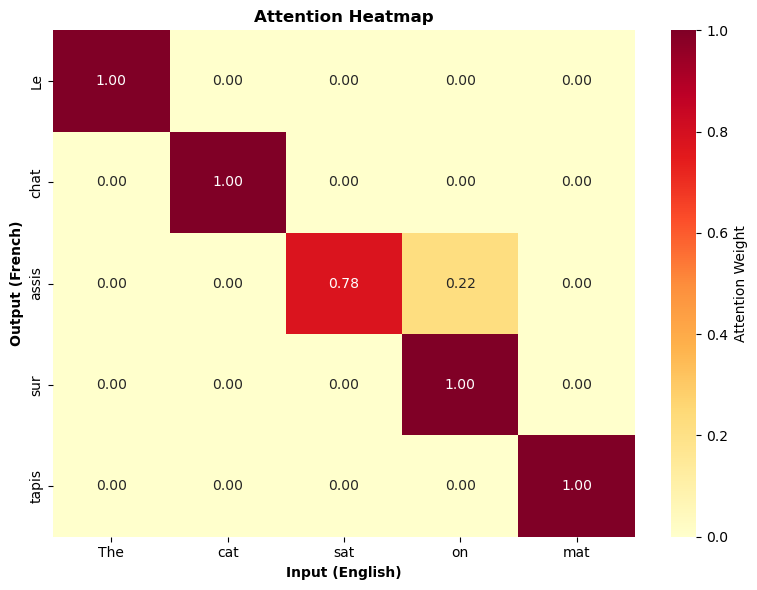


Reading the heatmap:
- Each ROW = one output word
- Each COLUMN = one input word
- BRIGHT = high attention (decoder focuses here)
- DARK = low attention (decoder ignores)

Notice: Words often align to their translations (diagonal)!


In [3]:
# Create realistic attention pattern
# English: "The cat sat on mat"
# French:  "Le chat assis sur tapis"

source = ["The", "cat", "sat", "on", "mat"]
target = ["Le", "chat", "assis", "sur", "tapis"]

# Create attention matrix
attention = np.zeros((len(target), len(source)))

# Realistic alignments (diagonal pattern)
attention[0, 0] = 0.9  # "Le" → "The"
attention[1, 1] = 0.9  # "chat" → "cat"
attention[2, 2] = 0.7  # "assis" → "sat"
attention[2, 3] = 0.2  # "assis" → "on" (some attention)
attention[3, 3] = 0.9  # "sur" → "on"
attention[4, 4] = 0.9  # "tapis" → "mat"

# Normalize rows
attention = attention / attention.sum(axis=1, keepdims=True)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(attention, annot=True, fmt='.2f', cmap='YlOrRd',
           xticklabels=source, yticklabels=target,
           cbar_kws={'label': 'Attention Weight'})
plt.xlabel('Input (English)', fontweight='bold')
plt.ylabel('Output (French)', fontweight='bold')
plt.title('Attention Heatmap', fontweight='bold')
plt.tight_layout()
plt.show()

print("\nReading the heatmap:")
print("- Each ROW = one output word")
print("- Each COLUMN = one input word")
print("- BRIGHT = high attention (decoder focuses here)")
print("- DARK = low attention (decoder ignores)")
print("\nNotice: Words often align to their translations (diagonal)!")

## 4. Attention in Action

Let's see attention working step-by-step for generating one word:

In [4]:
def decode_with_attention_demo():
    """
    Show attention working for one decoding step
    """
    input_words = ["The", "cat", "sat"]
    print(f"\nInput: {' '.join(input_words)}")
    print("Goal: Generate French translation\n")
    
    # Simulate encoder states
    encoder_states = np.random.randn(3, 8)
    
    # Decoder generating first word
    print("Step 1: Generate first French word")
    decoder_state = np.random.randn(8)
    weights, context = calculate_attention(decoder_state, encoder_states)
    
    print("\nInterpretation:")
    for word, weight in zip(input_words, weights):
        bars = '█' * int(weight * 20)
        print(f"  '{word}': {bars} {weight:.2f}")
    
    best_idx = np.argmax(weights)
    print(f"\nDecoder focuses most on: '{input_words[best_idx]}'")
    print("This helps generate the right French word!")

decode_with_attention_demo()


Input: The cat sat
Goal: Generate French translation

Step 1: Generate first French word

Calculating Attention:
Scores: [ 0.91755565 -0.91757422 -2.05535852]
Weights: [0.82593652 0.1318135  0.04224997]
Sum: 1.0000 (should be 1.0)
  Word 0: weight=0.826
  Word 1: weight=0.132
  Word 2: weight=0.042

Interpretation:
  'The': ████████████████ 0.83
  'cat': ██ 0.13
  'sat':  0.04

Decoder focuses most on: 'The'
This helps generate the right French word!


## 5. With vs Without Attention

Let's compare performance:

In [ ]:
# Simulated quality scores
sentence_lengths = [5, 10, 20, 30, 40]
quality_without = [90, 80, 60, 30, 15]  # Crashes
quality_with = [92, 90, 85, 78, 72]     # Stays strong

# Plot comparison
plt.figure(figsize=(10, 5))

plt.plot(sentence_lengths, quality_without, 'o-', linewidth=3, 
        label='Without Attention', color='#FF6B6B', markersize=10)
plt.plot(sentence_lengths, quality_with, 's-', linewidth=3, 
        label='With Attention', color='#4ECDC4', markersize=10)

plt.xlabel('Sentence Length (words)', fontweight='bold')
plt.ylabel('Translation Quality (%)', fontweight='bold')
plt.title('Attention Makes Long Sentences Possible', fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.ylim(0, 100)

# Annotations
plt.annotate('Quality crashes!', xy=(30, 30), xytext=(25, 45),
           fontsize=10, color='red', fontweight='bold',
           arrowprops=dict(arrowstyle='->', color='red', lw=2))
plt.annotate('Stays strong!', xy=(35, 72), xytext=(28, 85),
           fontsize=10, color='green', fontweight='bold',
           arrowprops=dict(arrowstyle='->', color='green', lw=2))

plt.tight_layout()
plt.show()

print("\nKey Results:")
print("- Short (5 words): Both work (90% vs 92%)")
print("- Medium (20 words): Attention better (85% vs 60%)")
print("- Long (40 words): Attention CRITICAL (72% vs 15%)")
print("\nAttention enables long-sentence translation!")

## 6. Key Takeaways

### What You Learned

1. **The Problem**: Fixed context vector = bottleneck for long sentences

2. **The Solution**: Attention lets decoder look at ALL encoder states

3. **How It Works**:
   ```python
   scores = encoder_states @ decoder_state  # Relevance
   weights = softmax(scores)                # Normalize
   context = sum(weights * encoder_states)  # Weighted combo
   ```

4. **The Impact**: Custom context for each output word

### Why It Matters

```
Key Insight:
Don't compress everything into one vector.
Keep all information and focus on what's relevant when needed!
```

This idea revolutionized AI:
- Google Translate (2016)
- Transformers (2017)
- GPT, BERT, ChatGPT (2018-2024)

### What's Next?

**Part 3: Beam Search**
- Finding better translations
- Why greedy fails
- Modern translation systems

---

## Try It Yourself

In [ ]:
# Experiment: Create your own attention pattern!
# Higher weights = decoder focuses more

my_attention = np.array([
    [0.8, 0.1, 0.1],   # First output: focuses on first input
    [0.1, 0.8, 0.1],   # Second output: focuses on second input
    [0.1, 0.1, 0.8],   # Third output: focuses on third input
])

# Visualize
plt.figure(figsize=(6, 5))
sns.heatmap(my_attention, annot=True, fmt='.2f', cmap='YlOrRd')
plt.xlabel('Input Words', fontweight='bold')
plt.ylabel('Output Words', fontweight='bold')
plt.title('Your Custom Attention Pattern', fontweight='bold')
plt.tight_layout()
plt.show()

# Questions:
# 1. What pattern do you see? (Hint: diagonal!)
# 2. Try changing the weights - what happens?
# 3. Can you make output word 2 attend to ALL inputs equally?